# 3 Autogen - Stocks examples

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

31/05/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import openai
import os
import sys

from autogen.coding import LocalCommandLineCodeExecutor
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [3]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [4]:
check_openai_version()

Installed OpenAI version: 1.30.5
[OK] OpenAI version 1.30.5 is >= 1.0.0


## 1. Settings

In [5]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

In [6]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    #filter_dict={"tags": ["gpt-4"]},  # comment out to get all
)
# When using a single openai endpoint, you can use the following:
# config_list = [{"model": "gpt-4", "api_key": os.getenv("OPENAI_API_KEY")}]

## 2. Agents

In [7]:
# create an AssistantAgent named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": None,
        "config_list": config_list,
        "temperature": 0,
    },
)

In [8]:
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith(
        "TERMINATE"),
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir=WORK_DIR),
    },
)

In [9]:
assistant

In [10]:
user_proxy

## 3. Examples

In [11]:
# the assistant receives a message from the user_proxy, which contains the task description
chat_res = user_proxy.initiate_chat(
    assistant,
    message=
    """What is the current date today? Compare the year-to-date gain for META and TESLA.""",
    summary_method="reflection_with_llm",
)

user_proxy (to assistant):

What is the current date today? Compare the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To get the current date, we can use Python's built-in datetime module. Here is the Python code to get the current date:

```python
import datetime

# Get the current date
current_date = datetime.datetime.now()

print("Today's date is:", current_date.strftime("%Y-%m-%d"))
```

To compare the year-to-date (YTD) gain for META (Facebook) and TESLA, we need to fetch the stock prices at the start of the year and the current stock prices. We can use the yfinance module in Python to fetch this data. 

Here is the Python code to fetch the YTD gain for META and TESLA:

```python
import yfinance as yf
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Get the stock data for the start of the year and now
meta_data = yf.download('FB', start=f

In [12]:
chat_res

ChatResult(chat_id=None, chat_history=[{'content': 'What is the current date today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': 'To get the current date, we can use Python\'s built-in datetime module. Here is the Python code to get the current date:\n\n```python\nimport datetime\n\n# Get the current date\ncurrent_date = datetime.datetime.now()\n\nprint("Today\'s date is:", current_date.strftime("%Y-%m-%d"))\n```\n\nTo compare the year-to-date (YTD) gain for META (Facebook) and TESLA, we need to fetch the stock prices at the start of the year and the current stock prices. We can use the yfinance module in Python to fetch this data. \n\nHere is the Python code to fetch the YTD gain for META and TESLA:\n\n```python\nimport yfinance as yf\nfrom datetime import datetime\n\n# Get the current year\ncurrent_year = datetime.now().year\n\n# Get the stock data for the start of the year and now\nmeta_data = yf.download(\'FB\', start=f\'{current_year}-01-01

In [13]:
print("\033[1;31;34m")
print("Chat history:", chat_res.chat_history)


Chat history: [{'content': 'What is the current date today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': 'To get the current date, we can use Python\'s built-in datetime module. Here is the Python code to get the current date:\n\n```python\nimport datetime\n\n# Get the current date\ncurrent_date = datetime.datetime.now()\n\nprint("Today\'s date is:", current_date.strftime("%Y-%m-%d"))\n```\n\nTo compare the year-to-date (YTD) gain for META (Facebook) and TESLA, we need to fetch the stock prices at the start of the year and the current stock prices. We can use the yfinance module in Python to fetch this data. \n\nHere is the Python code to fetch the YTD gain for META and TESLA:\n\n```python\nimport yfinance as yf\nfrom datetime import datetime\n\n# Get the current year\ncurrent_year = datetime.now().year\n\n# Get the stock data for the start of the year and now\nmeta_data = yf.download(\'FB\', start=f\'{current_year}-01-01\', end=datetime.now().

In [14]:
print("\033[1;31;34m")
print("Summary:", chat_res.summary)


Summary: As of June 4, 2024, the year-to-date (YTD) gain for Meta Platforms (META) is approximately 37.89%, indicating an increase in the stock price since the start of the year. Conversely, Tesla (TSLA) has a YTD gain of approximately -29.04%, indicating a decrease in the stock price since the start of the year.


In [15]:
print("\033[1;31;34m")
print("Cost info:", chat_res.cost)


Cost info: {'usage_including_cached_inference': {'total_cost': 0.18722999999999998, 'gpt-4': {'cost': 0.18722999999999998, 'prompt_tokens': 4417, 'completion_tokens': 912, 'total_tokens': 5329}}, 'usage_excluding_cached_inference': {'total_cost': 0.18722999999999998, 'gpt-4': {'cost': 0.18722999999999998, 'prompt_tokens': 4417, 'completion_tokens': 912, 'total_tokens': 5329}}}


### Another example

In [16]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message=
    """Plot a chart of their stock price change YTD.
    Save the data to meta_tesla.csv and save the plot to meta_tesla.png.""",
)

user_proxy (to assistant):

Plot a chart of their stock price change YTD.
    Save the data to meta_tesla.csv and save the plot to meta_tesla.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the stock price change YTD for META and TESLA, and to save the data and the plot, we can use the matplotlib and pandas libraries in Python. Here is the Python code to do this:

```python
# filename: plot_stock.py

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Get the stock data for the start of the year and now
meta_data = yf.download('META', start=f'{current_year}-01-01', end=datetime.now().strftime('%Y-%m-%d'))
tesla_data = yf.download('TSLA', start=f'{current_year}-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Save the data to a CSV file
combined_data = pd.concat([meta_data['Close'], tesl


--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed


--------------------------------------------------------------------------------
assistant (to user_proxy):

Great! The code executed successfully. 

The stock price data for Meta Platforms (META) and Tesla (TSLA) from the start of the year to the current date has been saved in a CSV file named 'meta_tesla.csv'. 

A plot comparing the stock price changes of META and TESLA year-to-date has been saved as 'meta_tesla.png'. 

You can now open the 'meta_tesla.csv' file to view the data and the 'meta_tesla.png' file to view the plot.

TERMINATE

--------------------------------------------------------------------------------


In [17]:
with open(os.path.join(WORK_DIR, 'meta_tesla.csv'), 'r') as f:
    print(f.read())

Date,META,TESLA
2024-01-02,346.2900085449219,248.4199981689453
2024-01-03,344.4700012207031,238.4499969482422
2024-01-04,347.1199951171875,237.92999267578125
2024-01-05,351.95001220703125,237.49000549316406
2024-01-08,358.6600036621094,240.4499969482422
2024-01-09,357.42999267578125,234.9600067138672
2024-01-10,370.4700012207031,233.94000244140625
2024-01-11,369.6700134277344,227.22000122070312
2024-01-12,374.489990234375,218.88999938964844
2024-01-16,367.4599914550781,219.91000366210938
2024-01-17,368.3699951171875,215.5500030517578
2024-01-18,376.1300048828125,211.8800048828125
2024-01-19,383.45001220703125,212.19000244140625
2024-01-22,381.7799987792969,208.8000030517578
2024-01-23,385.20001220703125,209.13999938964844
2024-01-24,390.70001220703125,207.8300018310547
2024-01-25,393.17999267578125,182.6300048828125
2024-01-26,394.1400146484375,183.25
2024-01-29,401.0199890136719,190.92999267578125
2024-01-30,400.05999755859375,191.58999633789062
2024-01-31,390.1400146484375,187.289993

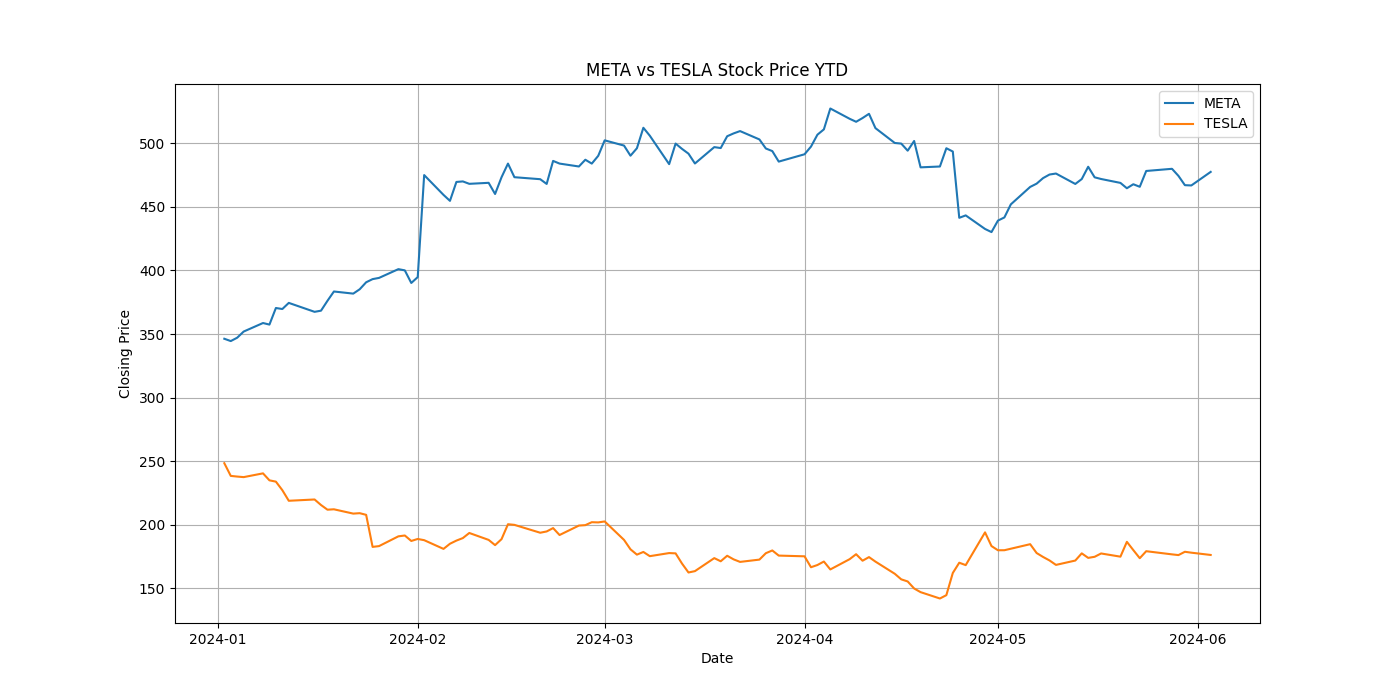

In [18]:
img = Image.open(os.path.join(WORK_DIR, 'meta_tesla.png'))
img

In [19]:
!ls $WORK_DIR/meta_tesla.* -lh

-rwxrwxrwx 1 root root 4.9K Jun  4 14:53 workdir/meta_tesla.csv
-rwxrwxrwx 1 root root  61K Jun  4 14:53 workdir/meta_tesla.png


In [20]:
user_proxy.send(
    recipient=assistant,
    message=
    """Generate a financial analysis based on the stocks prices and save the results into meta_tesla.txt""",
)

user_proxy (to assistant):

Generate a financial analysis based on the stocks prices and save the results into meta_tesla.txt

--------------------------------------------------------------------------------
assistant (to user_proxy):

To generate a financial analysis based on the stock prices, we can calculate some common financial metrics such as the mean, median, standard deviation, and percent change of the closing prices. We can also calculate the correlation between the two stocks. Here is the Python code to do this:

```python
# filename: financial_analysis.py

import yfinance as yf
import pandas as pd
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Get the stock data for the start of the year and now
meta_data = yf.download('META', start=f'{current_year}-01-01', end=datetime.now().strftime('%Y-%m-%d'))
tesla_data = yf.download('TSLA', start=f'{current_year}-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Calculate financial metric

In [21]:
!ls $WORK_DIR/meta_tesla.txt -lh

-rwxrwxrwx 1 root root 381 Jun  4 14:54 workdir/meta_tesla.txt
